In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

sns.set(style='white', context='notebook', palette='deep')



import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['train.csv', 'sample_submission.csv', 'test.csv']


In [3]:
train=pd.read_csv("../input/train.csv")
test=pd.read_csv("../input/test.csv")

In [4]:
Y_train=train["label"]
X_train=train.drop(labels = ["label"],axis = 1)

In [5]:
X_train=X_train/255
test=test/255

In [6]:
X_train.shape
X_train=X_train.values.reshape(-1,28,28,1)
Y_train = to_categorical(Y_train, num_classes = 10)

In [7]:
x_train,x_val,y_train,y_val=train_test_split(X_train, Y_train, test_size = 0.3, random_state = 2)

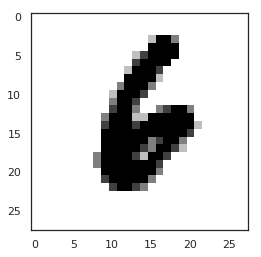

In [8]:
plt.imshow(x_train[0][:,:,0],cmap="gray_r")

In [27]:
model=Sequential()
model.add(Conv2D(input_shape=(28,28,1),filters=32,kernel_size=(5,5),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(1,1),activation="relu"))
model.add(MaxPool2D(pool_size=(1,1), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 2, 2, 64)          18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 1, 1, 64)          0         
__________

In [28]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer,loss = "categorical_crossentropy",metrics=["accuracy"])

learn_rate= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [29]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(X_train)

In [30]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=86),
                              epochs = 6, validation_data = (x_val,y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // 86
                              , callbacks=[learn_rate])

Epoch 1/6
488/488 [==============================] - 34s 69ms/step - loss: 1.0146 - acc: 0.6533 - val_loss: 0.1827 - val_acc: 0.9457
Epoch 2/6
488/488 [==============================] - 33s 68ms/step - loss: 0.4024 - acc: 0.8822 - val_loss: 0.1041 - val_acc: 0.9686
Epoch 3/6
488/488 [==============================] - 33s 68ms/step - loss: 0.3530 - acc: 0.9011 - val_loss: 0.1065 - val_acc: 0.9694
Epoch 4/6
488/488 [==============================] - 33s 68ms/step - loss: 0.3910 - acc: 0.8975 - val_loss: 0.1495 - val_acc: 0.9560
Epoch 5/6
488/488 [==============================] - 33s 68ms/step - loss: 0.4610 - acc: 0.8888 - val_loss: 0.1556 - val_acc: 0.9640
Epoch 6/6
488/488 [==============================] - 33s 68ms/step - loss: 0.6316 - acc: 0.8646 - val_loss: 0.2417 - val_acc: 0.9233

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


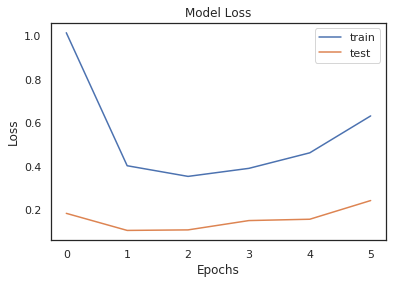

In [31]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

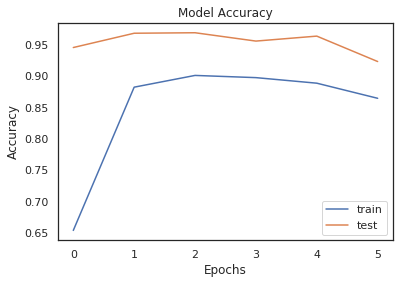

In [32]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()